In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.misc import toimage
from  PIL import Image

plt.rcParams['figure.figsize'] = (20.0, 10.0)

%matplotlib inline

Image data set obtained from: http://vision.stanford.edu/aditya86/ImageNetDogs

Data formats and sizes:
Images (757MB)
Annotations (21MB)
Lists, with train/test splits (0.5MB)
Train Features (1.2GB), Test Features (850MB)

Image format is .png
Annotations, lists, train/test features are in matlab file format

---------

Purpose of this notebook is to explore the available stanford dog breed data set to later train and test Image Classification model.



In [2]:
# list the image folders

path = 'C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\images'

img_folder = os.listdir(path)

print('{} folders in img_folder'.format(len(img_folder)))
print('\n'.join(img_folder))

120 folders in img_folder
n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound
n02088238-basset
n02088364-beagle
n02088466-bloodhound
n02088632-bluetick
n02089078-black-and-tan_coonhound
n02089867-Walker_hound
n02089973-English_foxhound
n02090379-redbone
n02090622-borzoi
n02090721-Irish_wolfhound
n02091032-Italian_greyhound
n02091134-whippet
n02091244-Ibizan_hound
n02091467-Norwegian_elkhound
n02091635-otterhound
n02091831-Saluki
n02092002-Scottish_deerhound
n02092339-Weimaraner
n02093256-Staffordshire_bullterrier
n02093428-American_Staffordshire_terrier
n02093647-Bedlington_terrier
n02093754-Border_terrier
n02093859-Kerry_blue_terrier
n02093991-Irish_terrier
n02094114-Norfolk_terrier
n02094258-Norwich_terrier
n02094433-Yorkshire_terrier
n02095314-wire-haired_fox_terrier
n02095570-Lakeland_terrier
n02095889-Sealyh

87 images in pug_folder


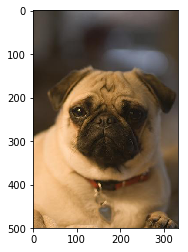

In [3]:
pug_folder = os.path.join(path,'n02110958-pug')

print('{} images in pug_folder'.format(len(pug_folder)))
pug_images = os.listdir(pug_folder)

os.chdir(pug_folder)

im = Image.open(pug_images[12],'r')
plt.imshow(im)

In [4]:
from __future__ import print_function

print(im.format, im.size, im.mode)

JPEG (333, 500) RGB


JPEG (375, 500) RGB


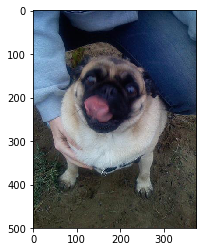

In [5]:
im = Image.open(pug_images[13],'r')
plt.imshow(im)
print(im.format, im.size, im.mode)

JPEG (500, 375) RGB


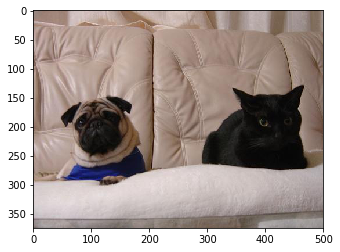

In [6]:
im = Image.open(pug_images[68],'r')
plt.imshow(im)
print(im.format, im.size, im.mode)

In [7]:
# check for class imbalance of labels and data

file_list = loadmat(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\file_list.mat''')
print(file_list.keys())

dict_keys(['__globals__', 'labels', '__header__', 'annotation_list', '__version__', 'file_list'])


In [8]:
df = pd.DataFrame(file_list['labels'], columns=['breed_label'], index=file_list['file_list'], dtype='int64')
df.head()

,breed_label
"([n02085620-Chihuahua/n02085620_10074.jpg],)",1
"([n02085620-Chihuahua/n02085620_10131.jpg],)",1
"([n02085620-Chihuahua/n02085620_10621.jpg],)",1
"([n02085620-Chihuahua/n02085620_1073.jpg],)",1
"([n02085620-Chihuahua/n02085620_10976.jpg],)",1


In [9]:
file_list['annotation_list'][0][0]
#annotation simply provides the image file name per label breed..same as file_list

array(['n02085620-Chihuahua/n02085620_10074'], dtype='<U35')

In [10]:
df.shape

(20580, 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20580 entries, ([n02085620-Chihuahua/n02085620_10074.jpg],) to ([n02116738-African_hunting_dog/n02116738_9924.jpg],)
Data columns (total 1 columns):
breed_label    20580 non-null int64
dtypes: int64(1)
memory usage: 321.6+ KB


In [12]:
# checking for missing labels
df['breed_label'].isnull().any()

False

In [13]:
missing_values_count = df.isnull().sum()
missing_values_count

breed_label    0
dtype: int64

I conclude the train/test labels is clean and not missing any data.  The input data does not require any further examination as input data will be images (and by nature, will not have missing data).  

In [14]:
df.nunique()

breed_label    120
dtype: int64

In [15]:
avg_num_images = 20582/120
median_num_images = df['breed_label'].value_counts().median()


In [16]:
# given 20,580 labels, does this correspond to the amount of images?

image_count = sum([len(files) for r, d, files in os.walk(path)])

print(image_count)

20580


Exploring further into the image labels...

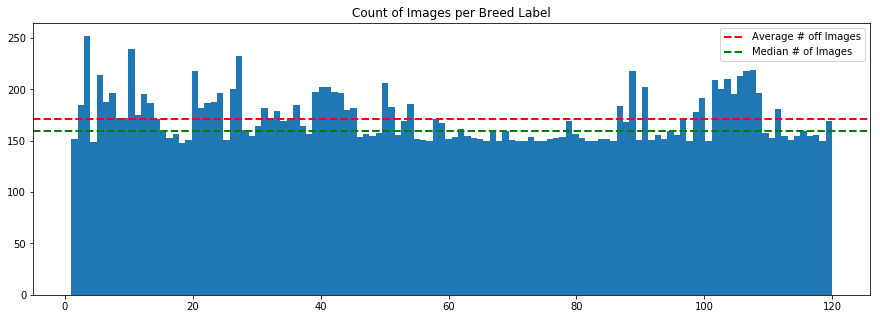

In [17]:

df.hist(bins=120, grid=False, figsize=(15,5))
plt.axhline(avg_num_images, color='r', linestyle='dashed', linewidth=2, label='Average # off Images')
plt.axhline(median_num_images, color='g', linestyle='dashed', linewidth=2, label='Median # of Images')
plt.legend()
plt.title('Count of Images per Breed Label')

plt.show()

The list/annotation data is for the entire dataset (has not been split into train, validate or test partitions).  Will need to take correct proportions of each breed (can't shuffle).  Also given the distribution of images per breed_label, does not seem we have a major class imbalance.  However, the data seems a bit light at just 150-250 images per breed_label.  

In [18]:
#repeat the process with loading and referencing images and display in subplot/grid
# currently getting Errno13, permission denied. Skip for now...
"""
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        for img in os.listdir(filename):
            img = Image.open(os.path.join(folder, filename), mode='r')
            images.append(img)
    return images

image_set = load_images_from_folder(path)
"""
#root_folder = '[whatever]/data/train'
# use path variable
#folders = [os.path.join(path, x) for x in img_folder]
#all_images = [img for folder in folders for img in load_images_from_folder(folder)]

"\ndef load_images_from_folder(folder):\n    images = []\n    for filename in os.listdir(folder):\n        for img in os.listdir(filename):\n            img = Image.open(os.path.join(folder, filename), mode='r')\n            images.append(img)\n    return images\n\nimage_set = load_images_from_folder(path)\n"

In [19]:
train_data = loadmat(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\train_data.mat''')
print(train_data.keys())

dict_keys(['train_info', '__globals__', '__header__', 'train_data', '__version__', 'train_fg_data'])


In [62]:
train_data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012',
 '__version__': '1.0',
 'train_data': array([[1.        , 0.37021212, 0.38627623, ..., 0.21216631, 0.33752761,
         0.26825407],
        [0.37021212, 1.        , 0.45434285, ..., 0.14359524, 0.3095    ,
         0.17709522],
        [0.38627623, 0.45434285, 1.        , ..., 0.16968838, 0.28702648,
         0.20437348],
        ...,
        [0.21216631, 0.14359524, 0.16968838, ..., 1.        , 0.22314713,
         0.41941136],
        [0.33752761, 0.3095    , 0.28702648, ..., 0.22314713, 1.        ,
         0.31585238],
        [0.26825407, 0.17709522, 0.20437348, ..., 0.41941136, 0.31585238,
         1.        ]]),
 'train_fg_data': array([[4.32900433e-04, 2.88600289e-04, 2.88600289e-04, ...,
         3.96825397e-04, 3.24675325e-04, 2.30880231e-03],
        [0.00000000e+00, 6.34920635e-04, 6.98412698e-04, ...,
         1.90476190e-04, 3.17460317e-05, 4.09523810e-03],

In [30]:
train_data['train_fg_data'][0]
print(len(train_data['train_fg_data'][0]))

5376


In [31]:
train_data['train_data'][0]
print(len(train_data['train_data'][0]))

12000


In [69]:
#what exactly is the train_info values comprised of?
train_data['train_info']

array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9333'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_2503'], dtype='<U44')]],
      dtype=object),

In [70]:
len(train_data['train_info'])
#so it's a single array... of multiple arrays

1

In [105]:
file_list = train_data['train_info'][0][0][0] #array of array of arrays...
annotation_list = train_data['train_info'][0][0][1]
labels = train_data['train_info'][0][0][2]
fg_ids = train_data['train_info'][0][0][3]

print(file_list.shape)
print(annotation_list.shape)
print(labels.shape)
print(fg_ids.shape)


(12000, 1)
(12000, 1)
(12000, 1)
(12000, 1)


In [113]:
print(labels[0][0].shape)

()


In [52]:
train_info = pd.DataFrame(train_data['train_info'][0])
train_info.head()

,file_list,annotation_list,labels,fg_ids
0,"[[[n02085620-Chihuahua/n02085620_5927.jpg]], [...","[[[n02085620-Chihuahua/n02085620_5927]], [[n02...","[[1], [1], [1], [1], [1], [1], [1], [1], [1], ...",[[[histograms_spm/n02085620-Chihuahua/n0208562...


In [101]:
#define NP arrays to construct DF will need to do this for the test data too

def mat_to_df(filepath, struc_label):
    matfile = loadmat(filepath)
    file_list_arr = matfile[struc_label][0][0][0]
    annot_list_arr = matfile[struc_label][0][0][1]
    labels_arr = matfile[struc_label][0][0][2]
    fg_id_arr = matfile[struc_label][0][0][3]
    
    data = np.array([annot_list_arr, labels_arr, fg_id_arr])
    
    df = pd.DataFrame(data)
    return df

In [114]:
#train_data = mat_to_df(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\train_data.mat''', 'train_info')
#test_data = mat_to_df(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\test_data.mat''', 'test_info')

In [73]:
'''
def print_mat_nested(d, indent=0, nkeys=0):
    """Pretty print nested structures from .mat files   
    Inspired by: `StackOverflow <http://stackoverflow.com/questions/3229419/pretty-printing-nested-dictionaries-in-python>`_
    """
    # Subset dictionary to limit keys to print.  Only works on first level
   
    if nkeys>0:
        d = {k: d[k] for k in d.keys()[:nkeys]} # Dictionary comprehension: limit to first nkeys keys.
    
    if isinstance(d, dict): 
        for key, value in d.iteritems(): # iteritems loops through key, value pairs
            print('\t' * indent + 'Key: ' + str(key)) 
            print_mat_nested(value, indent+1)
            
    if isinstance(d,np.ndarray) and d.dtype.names is not None:
        for n in d.dtype.names:  
            print('\t' * indent + 'Field: ' + str(n))
            print_mat_nested(d[n], indent+1)
''' 
#not used

What we need for model is X_train, y_train, X_test and y_test.

X_train: images as defined by train_data (need to obtain this as list), fed through image pre-processing into array data object.
y_train: labels, obtained from the matlab train_data file
X_test: images as defined by test_data (need to obtain this as list), fed through image pre-processing into array data object.
y_test: labels, obtained from the matlab test_data file

In [121]:
#I realized I did not unzip/unpack a file which contains the list of stratified train/test splits.

train_list = loadmat(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\train_list.mat''')['file_list']
test_list = loadmat(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\test_list.mat''')['file_list']

In [126]:
len(train_list)


12000

In [127]:
len(test_list)

8580

In [50]:
#creating mock variables for TF

dict_keys(['__globals__', '__header__', 'test_info', 'test_fg_data', 'test_data', '__version__'])


In [137]:
train_labels = loadmat(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\train_list.mat''')['labels']
test_labels = loadmat(r'''C:\\Users\\Garrick\\Documents\\Springboard\\Capstone Project 2\\datasets\\train_list.mat''')['labels']

